In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
NO2_E04=pd.read_csv("NO2_E04.csv", index_col = "DATETIME")
NO2_E42=pd.read_csv("NO2_E42.csv", index_col = "DATETIME")
NO2_E43=pd.read_csv("NO2_E43.csv", index_col = "DATETIME")
NO2_E44=pd.read_csv("NO2_E44.csv", index_col = "DATETIME")
NO2_E50=pd.read_csv("NO2_E50.csv", index_col = "DATETIME")
NO2_E54=pd.read_csv("NO2_E54.csv", index_col = "DATETIME")
NO2_E57=pd.read_csv("NO2_E57.csv", index_col = "DATETIME")
#NO2_E58=pd.read_csv("NO2_E58.csv", index_col = "DATETIME")

In [3]:
NO2 = NO2_E04
NO2["mg/m^3_42"]=NO2_E42["mg/m^3_42"]
NO2["mg/m^3_43"]=NO2_E43["mg/m^3_43"]
NO2["mg/m^3_44"]=NO2_E44["mg/m^3_44"]
NO2["mg/m^3_50"]=NO2_E50["mg/m^3_50"]
NO2["mg/m^3_54"]=NO2_E54["mg/m^3_54"]
NO2["mg/m^3_57"]=NO2_E57["mg/m^3_57"]
#NO2["mg/m^3_58"]=NO2_E58["mg/m^3_58"]

NO2

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
DATETIME,,,,,,,
2021-01-01 01:00:00,37.0,31.0,36.0,33.0,27.0,29.0,18.0
2021-01-01 02:00:00,33.0,46.0,35.0,24.0,27.0,25.0,30.0
2021-01-01 03:00:00,24.0,18.0,33.0,14.0,12.0,12.0,4.0
2021-01-01 04:00:00,23.0,12.0,13.0,20.0,10.0,11.0,5.0
2021-01-01 05:00:00,35.0,12.0,12.0,19.0,15.0,15.0,7.0
...,...,...,...,...,...,...,...
2021-12-31 20:00:00,45.0,53.0,58.0,48.0,32.0,50.0,45.0
2021-12-31 21:00:00,42.0,51.0,63.0,44.0,32.0,44.0,45.0
2021-12-31 22:00:00,42.0,53.0,50.0,41.0,33.0,44.0,44.0


In [4]:
NO2.describe()

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
count,8417.000000,8371.000000,8417.000000,8351.000000,8409.000000,8444.000000,8342.000000
mean,25.718189,21.817943,37.529999,31.450844,24.773814,20.354098,18.292616
std,16.210414,15.844754,19.276859,17.754559,18.001347,15.295933,14.471279
min,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,1.000000
25%,13.000000,11.000000,23.000000,18.000000,11.000000,10.000000,8.000000
50%,22.000000,17.000000,34.000000,28.000000,20.000000,15.000000,14.000000
75%,36.000000,28.000000,49.000000,41.000000,35.000000,26.000000,23.000000
max,90.000000,114.000000,128.000000,127.000000,123.000000,103.000000,98.000000


In [5]:
NO2.count()/len(NO2)

mg/m^3_04    0.963484
mg/m^3_42    0.958219
mg/m^3_43    0.963484
mg/m^3_44    0.955929
mg/m^3_50    0.962569
mg/m^3_54    0.966575
mg/m^3_57    0.954899
dtype: float64

In [6]:
NO2[NO2.isna().any(axis=1)]

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
DATETIME,,,,,,,
2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 11:00:00,NaN,16.0,38.0,43.0,19.0,10.0,7.0
2021-01-04 12:00:00,NaN,16.0,35.0,31.0,18.0,14.0,12.0
...,...,...,...,...,...,...,...
2021-12-22 14:00:00,42.0,40.0,NaN,48.0,44.0,37.0,NaN
2021-12-22 15:00:00,33.0,39.0,NaN,48.0,32.0,39.0,NaN
2021-12-22 16:00:00,18.0,25.0,38.0,39.0,17.0,36.0,NaN


In [7]:
NAN =NO2[(NO2["mg/m^3_04"].isna())&(NO2["mg/m^3_42"].isna())&(NO2["mg/m^3_44"].isna())&(NO2["mg/m^3_50"].isna())&(NO2["mg/m^3_54"].isna())&(NO2["mg/m^3_57"].isna())]
NAN

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
DATETIME,,,,,,,
2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


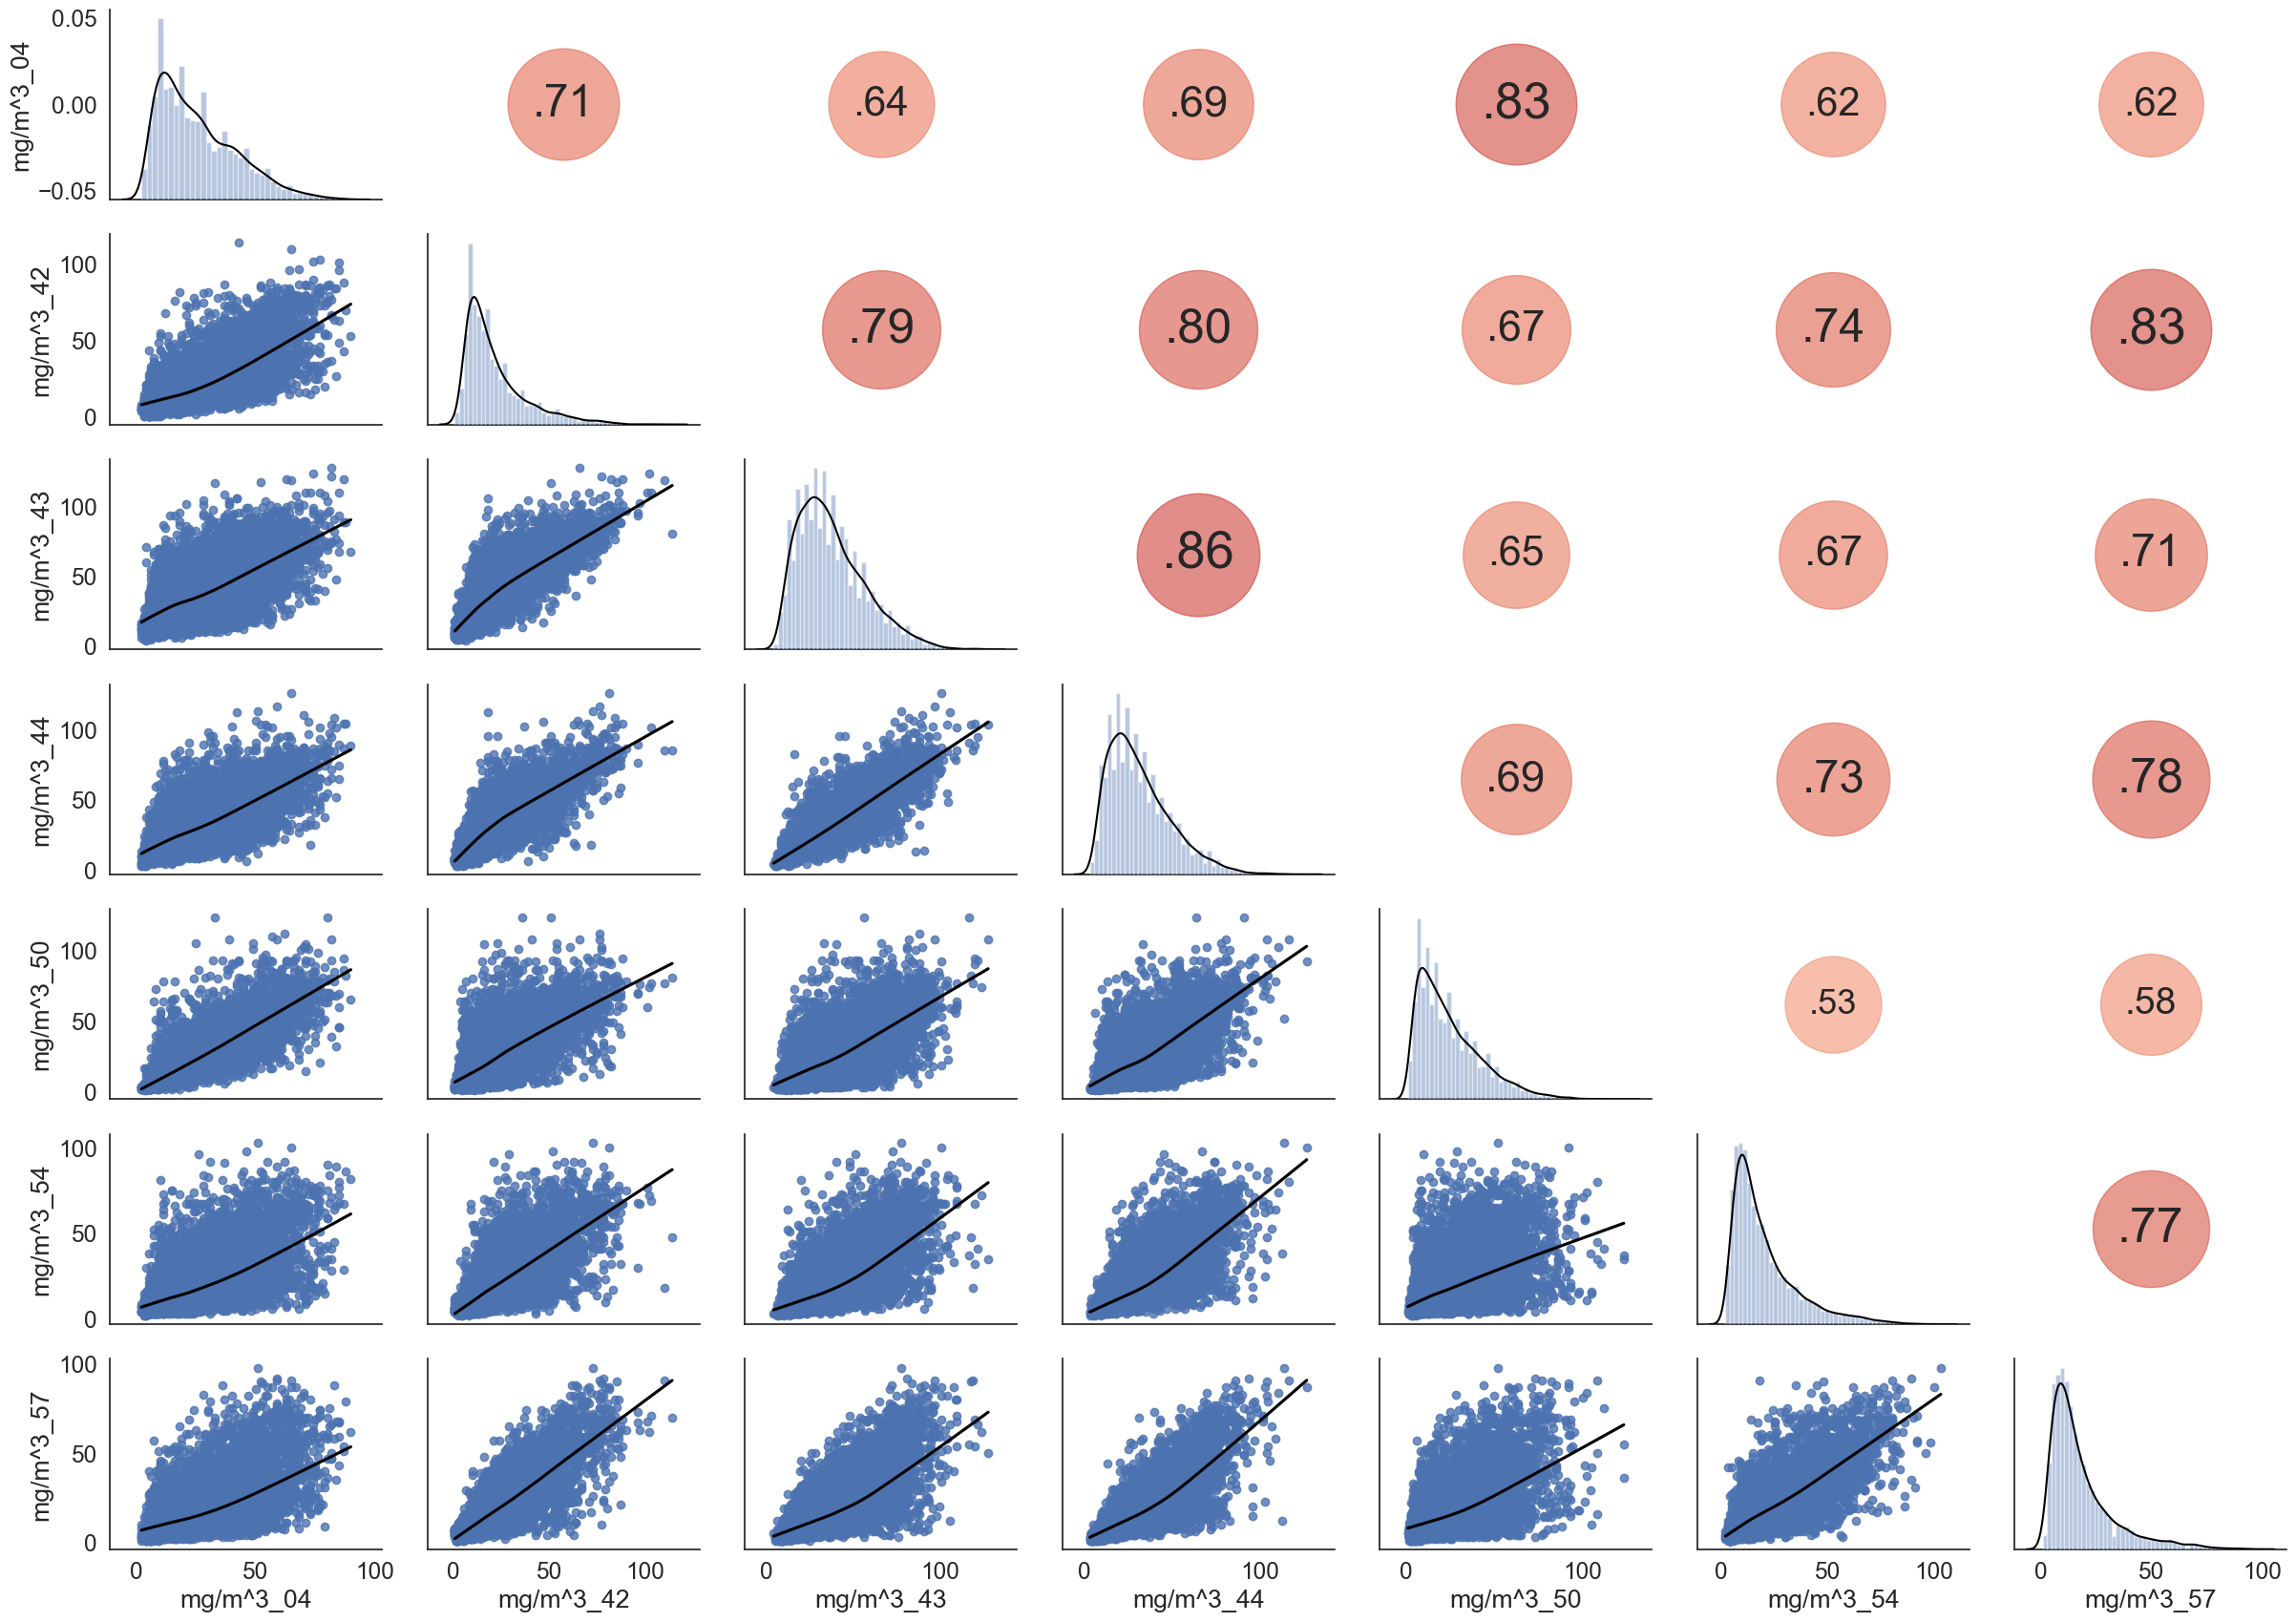

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NO2, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

plt.show()

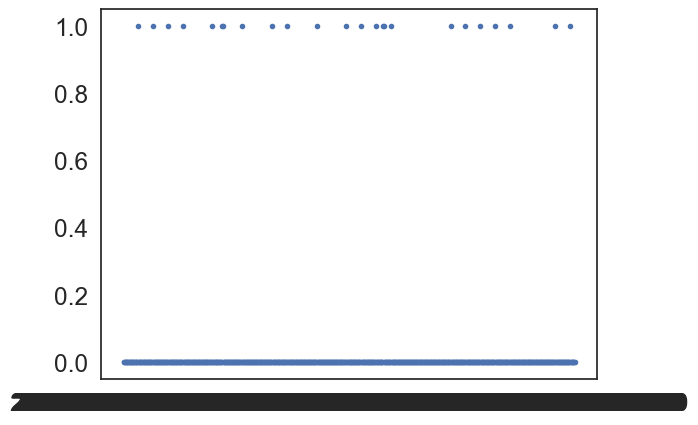

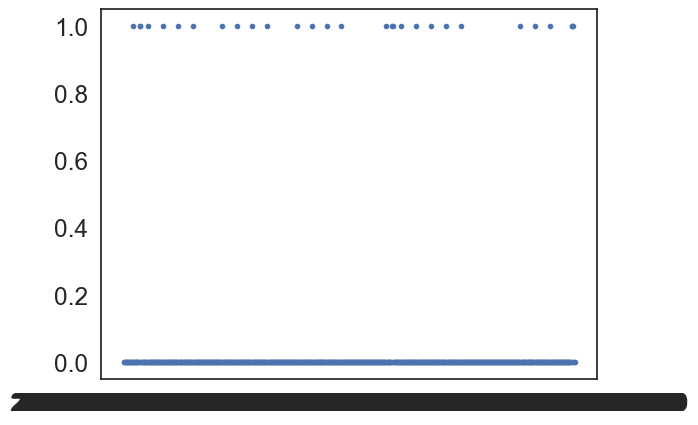

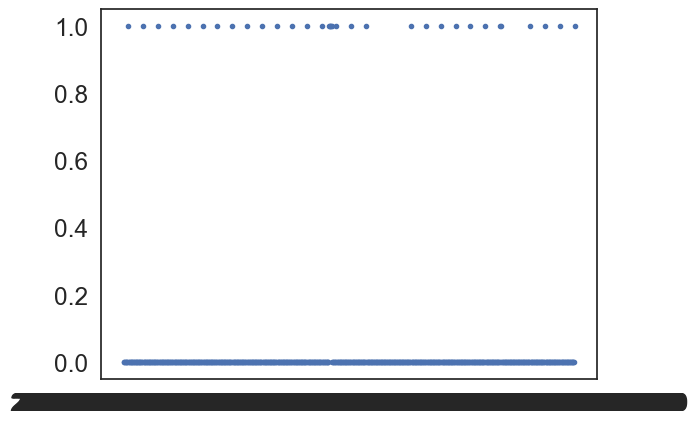

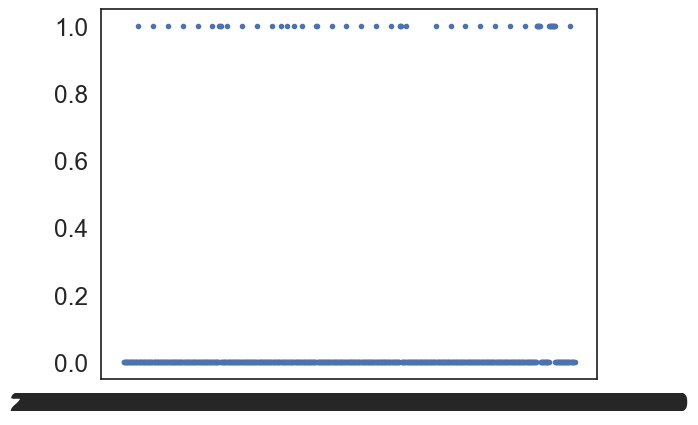

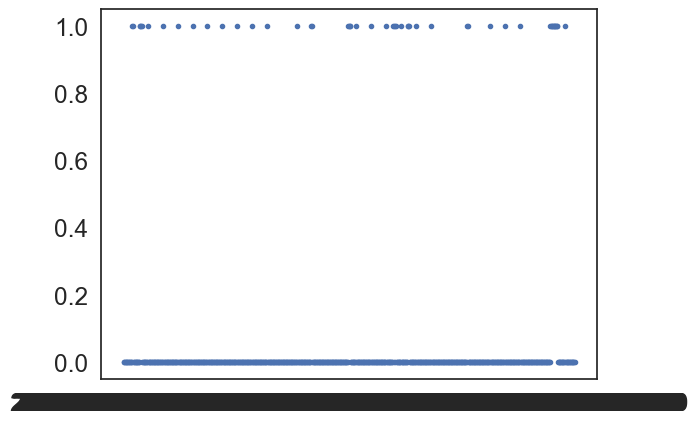

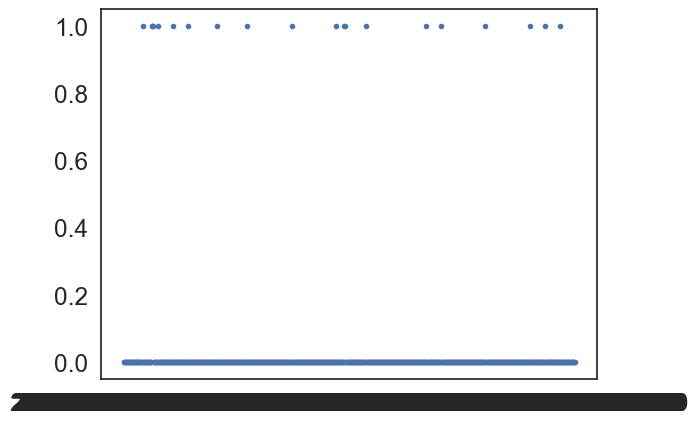

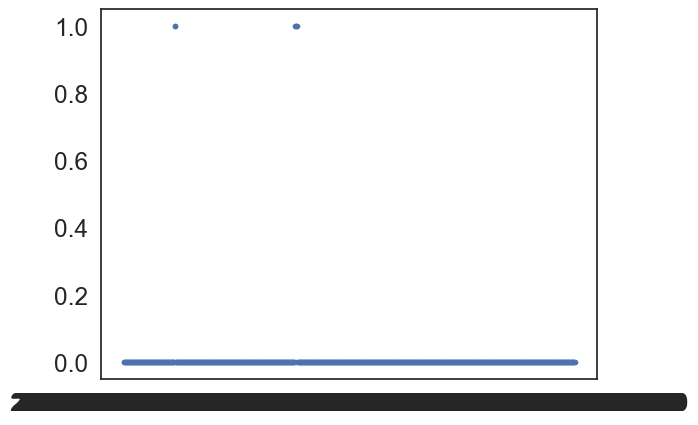

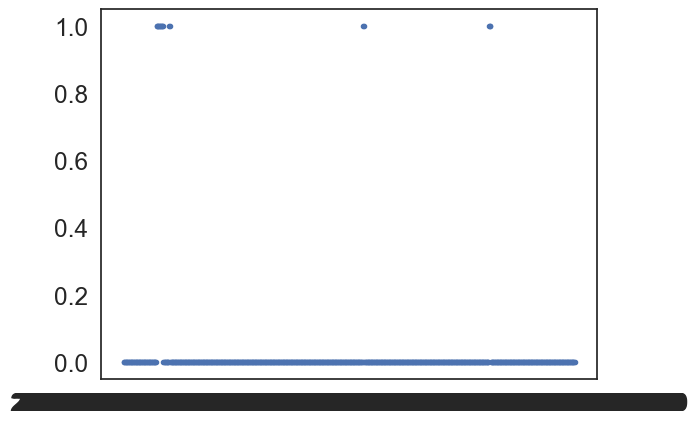

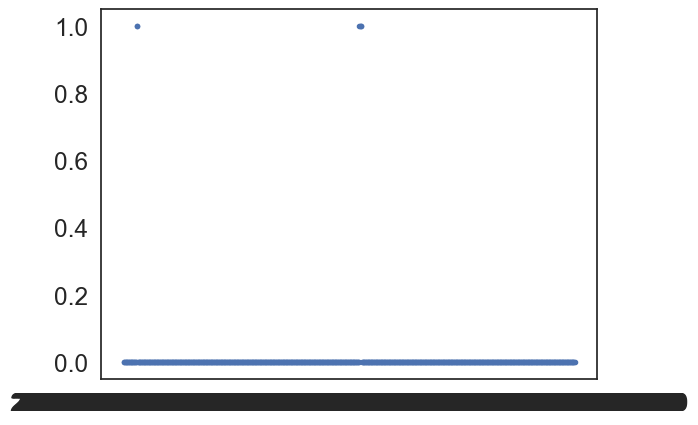

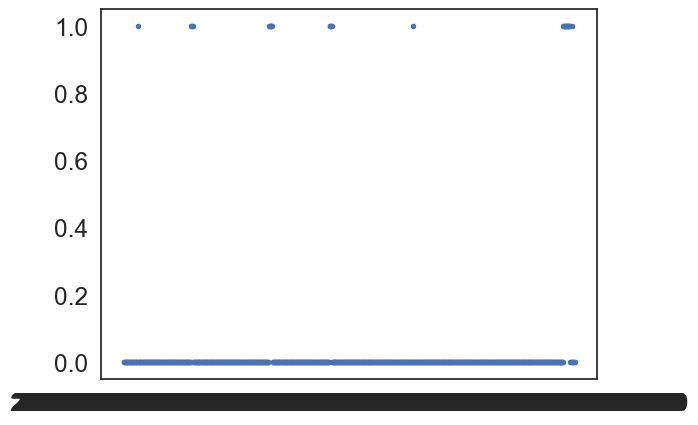

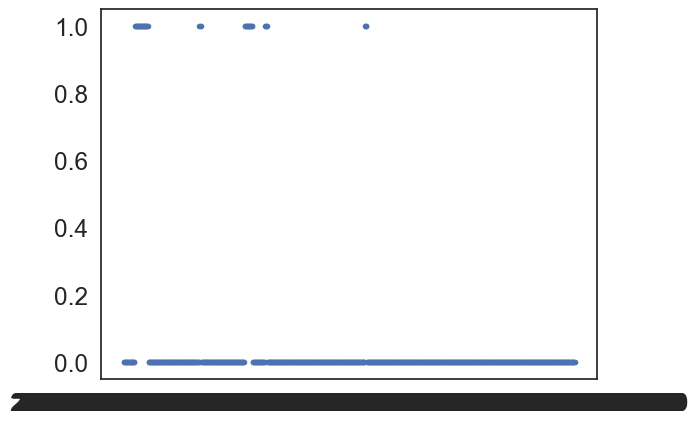

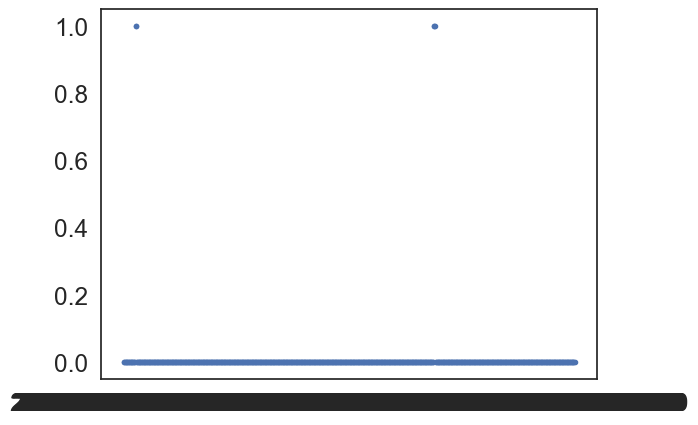

In [9]:
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[:728],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728:728*2],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*2:728*3],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*3:728*4],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*4:728*5],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*5:728*6],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*6:728*7],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*7:728*8],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*8:728*9],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*9:728*10],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*10:728*11],'.')
plt.show()
plt.plot(NO2[["mg/m^3_43"]].isna().any(axis=1)[728*11:728*12],'.')
plt.show()

In [10]:
NO2_NNA_04_43=NO2[["mg/m^3_04","mg/m^3_43"]].dropna()
NO2_NNA_42_43=NO2[["mg/m^3_42","mg/m^3_43"]].dropna()
NO2_NNA_44_43=NO2[["mg/m^3_44","mg/m^3_43"]].dropna()
NO2_NNA_50_43=NO2[["mg/m^3_50","mg/m^3_43"]].dropna()
NO2_NNA_54_43=NO2[["mg/m^3_54","mg/m^3_43"]].dropna()
NO2_NNA_57_43=NO2[["mg/m^3_57","mg/m^3_43"]].dropna()

In [11]:
from scipy.spatial.distance import cityblock

print(cityblock(NO2_NNA_04_43["mg/m^3_04"],NO2_NNA_04_43["mg/m^3_43"])/len(NO2_NNA_04_43))
print(cityblock(NO2_NNA_42_43["mg/m^3_42"],NO2_NNA_42_43["mg/m^3_43"])/len(NO2_NNA_42_43))
print(cityblock(NO2_NNA_44_43["mg/m^3_44"],NO2_NNA_44_43["mg/m^3_43"])/len(NO2_NNA_44_43))
print(cityblock(NO2_NNA_50_43["mg/m^3_50"],NO2_NNA_50_43["mg/m^3_43"])/len(NO2_NNA_50_43))
print(cityblock(NO2_NNA_54_43["mg/m^3_54"],NO2_NNA_54_43["mg/m^3_43"])/len(NO2_NNA_54_43))
print(cityblock(NO2_NNA_57_43["mg/m^3_57"],NO2_NNA_57_43["mg/m^3_43"])/len(NO2_NNA_57_43))

15.045716342692584
16.118590903607192
8.666948742746616
15.738613147458238
18.523923444976077
19.49685153790264


In [12]:
NO2_43_1=NO2[["mg/m^3_43"]]
NO2_43_1[[ "mg/m^3_43-1"]] =NO2_43_1[["mg/m^3_43"]]
NO2_43_1

,mg/m^3_43,mg/m^3_43-1
DATETIME,,
2021-01-01 01:00:00,36.0,36.0
2021-01-01 02:00:00,35.0,35.0
2021-01-01 03:00:00,33.0,33.0
2021-01-01 04:00:00,13.0,13.0
2021-01-01 05:00:00,12.0,12.0
...,...,...
2021-12-31 20:00:00,58.0,58.0
2021-12-31 21:00:00,63.0,63.0
2021-12-31 22:00:00,50.0,50.0


In [13]:
for j in range(1, len(NO2_43_1)):

    NO2_43_1[ "mg/m^3_43-1"][j] = NO2_43_1["mg/m^3_43"][j-1]
    
NO2_43_1

,mg/m^3_43,mg/m^3_43-1
DATETIME,,
2021-01-01 01:00:00,36.0,36.0
2021-01-01 02:00:00,35.0,36.0
2021-01-01 03:00:00,33.0,35.0
2021-01-01 04:00:00,13.0,33.0
2021-01-01 05:00:00,12.0,13.0
...,...,...
2021-12-31 20:00:00,58.0,56.0
2021-12-31 21:00:00,63.0,58.0
2021-12-31 22:00:00,50.0,63.0


In [14]:
NO2_NA_43_1=NO2_43_1[["mg/m^3_43","mg/m^3_43-1"]].dropna()

In [15]:
print(cityblock(NO2_NA_43_1["mg/m^3_43"],NO2_NA_43_1["mg/m^3_43-1"])/len(NO2_NA_43_1))

7.46644010195412


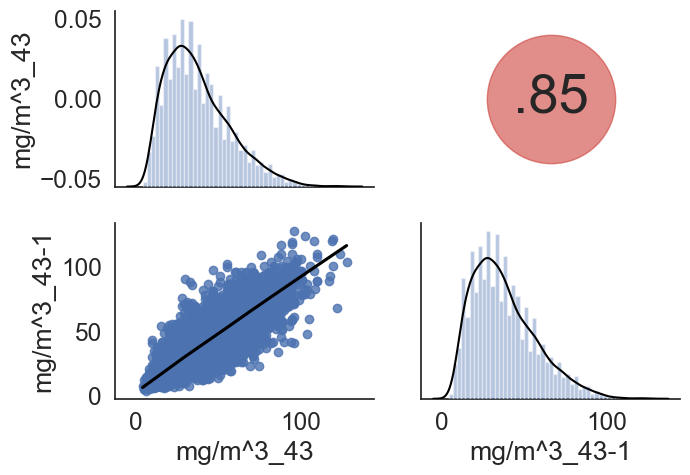

In [16]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NO2_43_1, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

plt.show()

In [17]:
NO2_43_INT1=NO2[["mg/m^3_43"]]
NO2_43_INT1[[ "mg/m^3_43int1"]] =NO2[["mg/m^3_43"]]
NO2_43_INT1

,mg/m^3_43,mg/m^3_43int1
DATETIME,,
2021-01-01 01:00:00,36.0,36.0
2021-01-01 02:00:00,35.0,35.0
2021-01-01 03:00:00,33.0,33.0
2021-01-01 04:00:00,13.0,13.0
2021-01-01 05:00:00,12.0,12.0
...,...,...
2021-12-31 20:00:00,58.0,58.0
2021-12-31 21:00:00,63.0,63.0
2021-12-31 22:00:00,50.0,50.0


In [18]:
for j in range(1, len(NO2_43_INT1)-1):

    NO2_43_INT1[ "mg/m^3_43int1"][j] = (NO2_43_INT1["mg/m^3_43"][j-1]+NO2_43_INT1["mg/m^3_43"][j+1])/2
    
NO2_43_INT1

,mg/m^3_43,mg/m^3_43int1
DATETIME,,
2021-01-01 01:00:00,36.0,36.0
2021-01-01 02:00:00,35.0,34.5
2021-01-01 03:00:00,33.0,24.0
2021-01-01 04:00:00,13.0,22.5
2021-01-01 05:00:00,12.0,11.5
...,...,...
2021-12-31 20:00:00,58.0,59.5
2021-12-31 21:00:00,63.0,54.0
2021-12-31 22:00:00,50.0,56.5


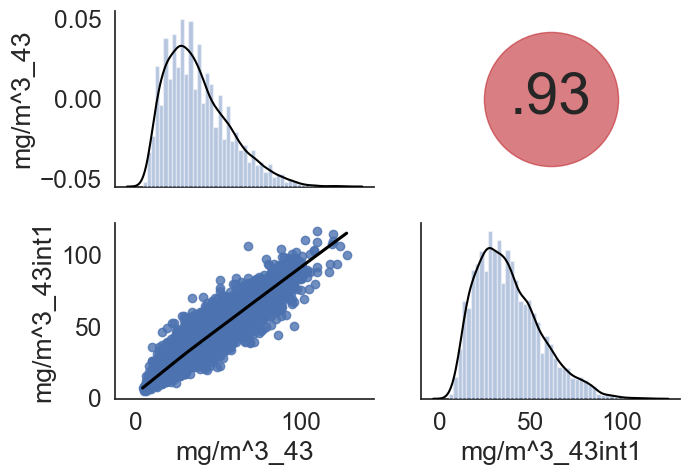

In [19]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NO2_43_INT1, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

plt.show()

In [20]:
NO2_NA_43_INT1=NO2_43_INT1.dropna()

from scipy.spatial.distance import cityblock
print(cityblock(NO2_NA_43_INT1["mg/m^3_43"],NO2_NA_43_INT1["mg/m^3_43int1"])/len(NO2_NA_43_INT1))

5.033738526420243


In [21]:
NO2_43_INT2=NO2[["mg/m^3_43"]]
NO2_43_INT2[[ "mg/m^3_43int2_1"]] =NO2[["mg/m^3_43"]]
NO2_43_INT2[[ "mg/m^3_43int2_2"]] =NO2[["mg/m^3_43"]]
NO2_43_INT2

,mg/m^3_43,mg/m^3_43int2_1,mg/m^3_43int2_2
DATETIME,,,
2021-01-01 01:00:00,36.0,36.0,36.0
2021-01-01 02:00:00,35.0,35.0,35.0
2021-01-01 03:00:00,33.0,33.0,33.0
2021-01-01 04:00:00,13.0,13.0,13.0
2021-01-01 05:00:00,12.0,12.0,12.0
...,...,...,...
2021-12-31 20:00:00,58.0,58.0,58.0
2021-12-31 21:00:00,63.0,63.0,63.0
2021-12-31 22:00:00,50.0,50.0,50.0


In [22]:
for j in range(1, len(NO2_43_INT2)-2):

    NO2_43_INT2[ "mg/m^3_43int2_1"][j] = NO2_43_INT2["mg/m^3_43"][j-1]+(NO2_43_INT2["mg/m^3_43"][j+2]-NO2_43_INT2["mg/m^3_43"][j-1])/3

for j in range(2, len(NO2_43_INT2)-1):

    NO2_43_INT2[ "mg/m^3_43int2_2"][j] = NO2_43_INT2["mg/m^3_43"][j-2]+(NO2_43_INT2["mg/m^3_43"][j+1]-NO2_43_INT2["mg/m^3_43"][j-2])*2/3

NO2_43_INT2

,mg/m^3_43,mg/m^3_43int2_1,mg/m^3_43int2_2
DATETIME,,,
2021-01-01 01:00:00,36.0,36.000000,36.000000
2021-01-01 02:00:00,35.0,28.333333,35.000000
2021-01-01 03:00:00,33.0,27.333333,20.666667
2021-01-01 04:00:00,13.0,25.333333,19.666667
2021-01-01 05:00:00,12.0,12.666667,17.666667
...,...,...,...
2021-12-31 20:00:00,58.0,54.000000,59.333333
2021-12-31 21:00:00,63.0,55.333333,52.000000
2021-12-31 22:00:00,50.0,59.666667,52.666667


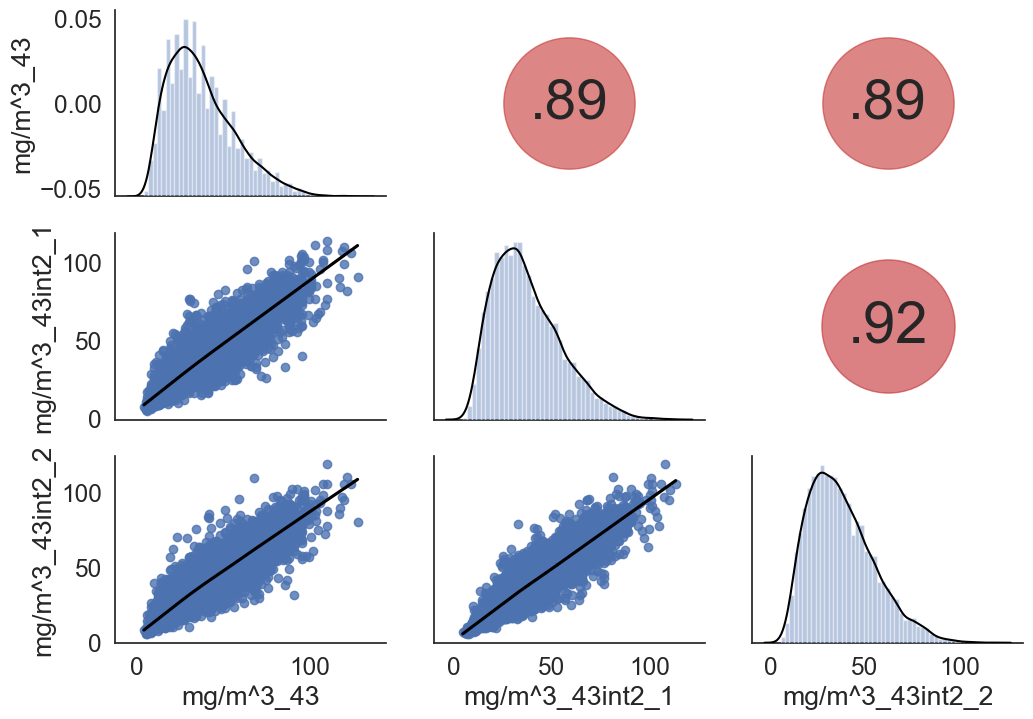

In [23]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NO2_43_INT2, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

plt.show()

In [24]:
NO2_NA_43_INT2=NO2_43_INT2.dropna()

from scipy.spatial.distance import cityblock
print(cityblock(NO2_NA_43_INT2["mg/m^3_43"],NO2_NA_43_INT2["mg/m^3_43int2_1"])/len(NO2_NA_43_INT2))
print(cityblock(NO2_NA_43_INT2["mg/m^3_43"],NO2_NA_43_INT2["mg/m^3_43int2_2"])/len(NO2_NA_43_INT2))

6.272605463347165
6.287171507607193


In [77]:
import numpy as np

NO2_43_INT = NO2[["mg/m^3_43"]]
NO2_43_INT[ "mg/m^3_43_INT"]= float("nan") 
NO2_43_INT[ "INT_43"]= float("nan")


for j in range(len(NO2_43_INT)):

    if NO2_43_INT["mg/m^3_43"].isna()[j] == False :
        NO2_43_INT[ "mg/m^3_43_INT"][j] =   NO2_43_INT[ "mg/m^3_43"][j]   
        NO2_43_INT[ "INT_43"][j] = 0
        
    elif NO2_43_INT["mg/m^3_43"].isna()[j-1] == False  and NO2_43_INT["mg/m^3_43"].isna()[j+1] == False:
        NO2_43_INT[ "mg/m^3_43_INT"][j] =   (NO2_43_INT[ "mg/m^3_43"][j-1]+ NO2_43_INT[ "mg/m^3_43"][j+1])/2  
        NO2_43_INT[ "INT_43"][j] = 1

    elif NO2_43_INT["mg/m^3_43"].isna()[j-1] == False  and NO2_43_INT["mg/m^3_43"].isna()[j+2] == False:
        
        NO2_43_INT[ "mg/m^3_43_INT"][j] =  NO2_43_INT[ "mg/m^3_43"][j-1]+(NO2_43_INT[ "mg/m^3_43"][j+2]- NO2_43_INT[ "mg/m^3_43"][j+2])/3  
        NO2_43_INT[ "INT_43"][j] = 2
        NO2_43_INT[ "mg/m^3_43_INT"][j+1] =  NO2_43_INT[ "mg/m^3_43"][j-1]+(NO2_43_INT[ "mg/m^3_43"][j+2]- NO2_43_INT[ "mg/m^3_43"][j+2])*2/3  
        NO2_43_INT[ "INT_43"][j+1] = 2
        
        
NO2_43_INT       

,mg/m^3_43,mg/m^3_43_INT,INT_43
DATETIME,,,
2021-01-01 01:00:00,36.0,36.0,0.0
2021-01-01 02:00:00,35.0,35.0,0.0
2021-01-01 03:00:00,33.0,33.0,0.0
2021-01-01 04:00:00,13.0,13.0,0.0
2021-01-01 05:00:00,12.0,12.0,0.0
...,...,...,...
2021-12-31 20:00:00,58.0,58.0,0.0
2021-12-31 21:00:00,63.0,63.0,0.0
2021-12-31 22:00:00,50.0,50.0,0.0


In [78]:
NO2_43_INT.count()/len(NO2_43_INT)

mg/m^3_43        0.963484
mg/m^3_43_INT    0.982830
INT_43           0.982830
dtype: float64

In [51]:
numpy.float64

numpy.float64

In [80]:
NO2_43_INT[ "NAN"]= 1


for j in range(1,len(NO2_43_INT)):

    if NO2_43_INT["mg/m^3_43"].isna()[j] == False :
        NO2_43_INT[ "NAN"][j] =   NO2_43_INT[ "NAN"][j-1]+1   
        
        
    else:
        NO2_43_INT[ "NAN"][j] = 0
        
        
NO2_43_INT       

,mg/m^3_43,mg/m^3_43_INT,INT_43,NAN
DATETIME,,,,
2021-01-01 01:00:00,36.0,36.0,0.0,1
2021-01-01 02:00:00,35.0,35.0,0.0,2
2021-01-01 03:00:00,33.0,33.0,0.0,3
2021-01-01 04:00:00,13.0,13.0,0.0,4
2021-01-01 05:00:00,12.0,12.0,0.0,5
...,...,...,...,...
2021-12-31 20:00:00,58.0,58.0,0.0,221
2021-12-31 21:00:00,63.0,63.0,0.0,222
2021-12-31 22:00:00,50.0,50.0,0.0,223


In [83]:
NO2_43_INT["NAN"].value_counts().sort_index().tail(50)

452    2
453    2
454    2
455    2
456    2
457    2
458    2
459    2
460    2
461    2
462    2
463    2
464    2
465    2
466    2
467    2
468    2
469    2
470    2
471    2
472    2
473    2
474    2
475    2
476    2
477    2
478    2
479    2
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
501    1
Name: NAN, dtype: int64

In [89]:
NO2_43_INT[NO2_43_INT["NAN"]==501]

,mg/m^3_43,mg/m^3_43_INT,INT_43,NAN
DATETIME,,,,
2021-08-03 13:00:00,42.0,42.0,0.0,501


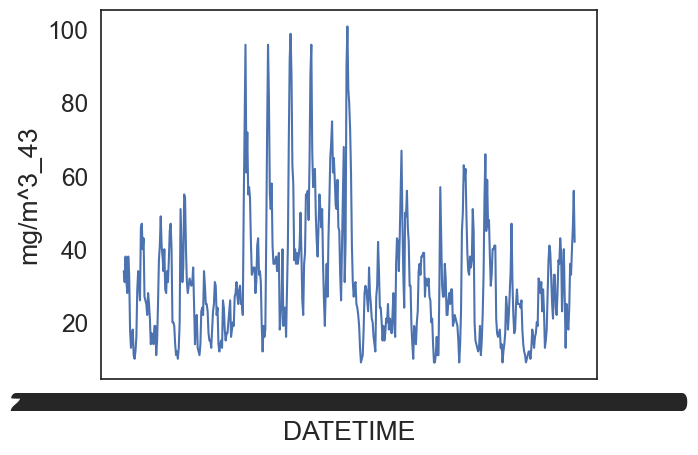

In [107]:
import seaborn as sbn

sbn.lineplot(data=NO2_43_INT[4648:5149]["mg/m^3_43"])
plt.show()